In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import smartlab as sl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('data.tsv', delimiter='\t')
data['$r,\\ \\text{мм}$'] = (data.iloc[:, 1] - 3.42) * 89.6 / 1000
data['$r^2,\\ \\text{мм}^2$'] = data.iloc[:, 2] ** 2
data['$|n|$'] = np.abs(data.iloc[:, 0])
data

,$n$,"$x,\ \text{дел}$","$r,\ \text{мм}$","$r^2,\ \text{мм}^2$",$|n|$
0,-8.0,0.87,-0.228480,0.052203,8.0
1,-7.5,0.96,-0.220416,0.048583,7.5
2,-7.0,1.06,-0.211456,0.044714,7.0
3,-6.5,1.17,-0.201600,0.040643,6.5
4,-6.0,1.23,-0.196224,0.038504,6.0
5,-5.5,1.31,-0.189056,0.035742,5.5
6,-5.0,1.40,-0.180992,0.032758,5.0
7,-4.5,1.51,-0.171136,0.029288,4.5
8,-4.0,1.63,-0.160384,0.025723,4.0
9,-3.5,1.74,-0.150528,0.022659,3.5


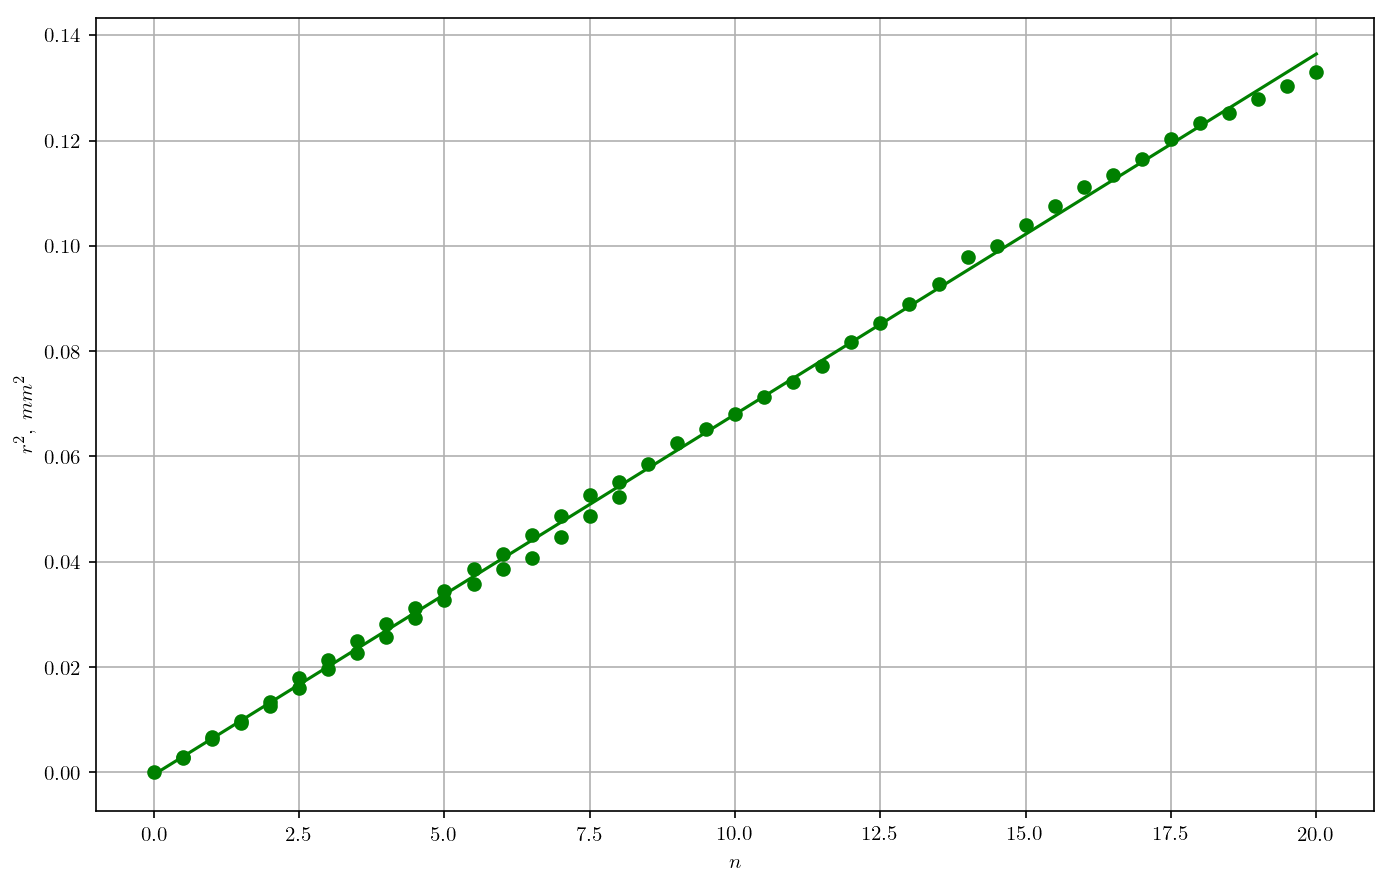

In [3]:
popt, pcov = curve_fit((lambda x, a, b: a * x + b), data.iloc[:, 4], data.iloc[:, 3])
X = np.linspace(0, 20, 100)
y = popt[0] * X + popt[1]

figure(figsize=(11, 7), dpi=150)
grid(which='both')
xlabel('$n$')
ylabel('$r^2,\\ mm^2$')
plot(data.iloc[:, 4], data.iloc[:, 3], 'go')
plot(X, y, '-g')
savefig('plot.png')

In [13]:
popt[0]

0.006847691222411023

In [12]:
np.sqrt(pcov[0][0])

3.1908704974976894e-05

In [4]:
data.iloc[:, 2] = data.iloc[:, 2].map('{0:.3f}'.format)
data.iloc[:, 3] = data.iloc[:, 3].map('{0:.3f}'.format)

In [5]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
$n$,-8,-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5,...,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20
"$x,\ \text{дел}$",0.87,0.96,1.06,1.17,1.23,1.31,1.4,1.51,1.63,1.74,...,7.08,7.14,7.18,7.23,7.29,7.34,7.37,7.41,7.45,7.49
"$r,\ \text{мм}$",-0.228,-0.220,-0.211,-0.202,-0.196,-0.189,-0.181,-0.171,-0.160,-0.151,...,0.328,0.333,0.337,0.341,0.347,0.351,0.354,0.358,0.361,0.365
"$r^2,\ \text{мм}^2$",0.052,0.049,0.045,0.041,0.039,0.036,0.033,0.029,0.026,0.023,...,0.108,0.111,0.113,0.117,0.120,0.123,0.125,0.128,0.130,0.133
$|n|$,8,7.5,7,6.5,6,5.5,5,4.5,4,3.5,...,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20


In [6]:
sl.table(data, transpose=True, piece=10)

\begin{tabular}{rrrrrrrrrrr}\\
$n$ & $-8.0$  & $-7.5$  & $-7.0$  & $-6.5$  & $-6.0$  & $-5.5$  & $-5.0$  & $-4.5$  & $-4.0$  & $-3.5$\\
$x,\ \text{дел}$ & $0.87$  & $0.96$  & $1.06$  & $1.17$  & $1.23$  & $1.31$  & $1.4$  & $1.51$  & $1.63$  & $1.74$\\
$r,\ \text{мм}$ & $-0.228$  & $-0.220$  & $-0.211$  & $-0.202$  & $-0.196$  & $-0.189$  & $-0.181$  & $-0.171$  & $-0.160$  & $-0.151$\\
$r^2,\ \text{мм}^2$ & $0.052$  & $0.049$  & $0.045$  & $0.041$  & $0.039$  & $0.036$  & $0.033$  & $0.029$  & $0.026$  & $0.023$\\
$|n|$ & $8.0$  & $7.5$  & $7.0$  & $6.5$  & $6.0$  & $5.5$  & $5.0$  & $4.5$  & $4.0$  & $3.5$\\
\hline
$n$ & $-3.0$  & $-2.5$  & $-2.0$  & $-1.5$  & $-1.0$  & $-0.5$  & $0.0$  & $0.5$  & $1.0$  & $1.5$\\
$x,\ \text{дел}$ & $1.86$  & $2.01$  & $2.17$  & $2.34$  & $2.51$  & $2.84$  & $3.42$  & $4.02$  & $4.31$  & $4.52$\\
$r,\ \text{мм}$ & $-0.140$  & $-0.126$  & $-0.112$  & $-0.097$  & $-0.082$  & $-0.052$  & $0.000$  & $0.054$  & $0.080$  & $0.099$\\
$r^2,\ \text{мм}^2$ & $

In [14]:
6.85 / 0.577

11.871750433275563